<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/K_Nearest_Neighbors_(KNN)_heartattackpredictiondataset_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
heart_df = pd.read_csv('/content/drive/My Drive/knndataset/heart_attack_prediction_dataset.csv')

In [5]:
heart_df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


The heart attack dataset includes both numerical and categorical features. The target column is Heart Attack Risk (binary: 0 = no risk, 1 = risk).

Planned Steps for KNN Modeling:
Drop irrelevant columns (e.g., Patient ID, Country, etc.).

Encode categorical variables (Sex, Continent, Hemisphere).

Scale features.

Apply PCA for dimensionality reduction.

Train and evaluate a KNN model.

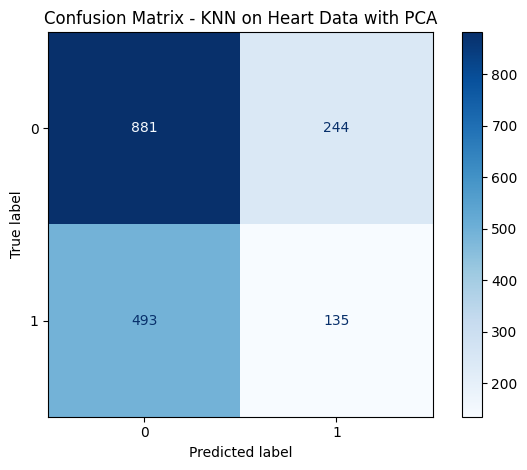

('              precision    recall  f1-score   support\n\n           0       0.64      0.78      0.71      1125\n           1       0.36      0.21      0.27       628\n\n    accuracy                           0.58      1753\n   macro avg       0.50      0.50      0.49      1753\nweighted avg       0.54      0.58      0.55      1753\n',
 0.5795778665145465,
 0.3562005277044855,
 0.21496815286624205,
 0.26812313803376364)

In [10]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Drop non-informative columns
heart_df_clean = heart_df.drop(columns=["Patient ID", "Country"])

# Step 2: Encode categorical columns
categorical_cols = ["Sex", "Continent", "Hemisphere","Diet"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    heart_df_clean[col] = le.fit_transform(heart_df_clean[col])
    label_encoders[col] = le

# Step 3: Handle composite string column (Blood Pressure)
# Split "Blood Pressure" into systolic and diastolic
bp_split = heart_df_clean["Blood Pressure"].str.split("/", expand=True)
heart_df_clean["Systolic_BP"] = pd.to_numeric(bp_split[0], errors="coerce")
heart_df_clean["Diastolic_BP"] = pd.to_numeric(bp_split[1], errors="coerce")
heart_df_clean = heart_df_clean.drop(columns=["Blood Pressure"])

# Step 4: Drop rows with any remaining NaNs
heart_df_clean = heart_df_clean.dropna()

# Step 5: Define features and target
X_heart = heart_df_clean.drop("Heart Attack Risk", axis=1)
y_heart = heart_df_clean["Heart Attack Risk"]

# Step 6: Scale features
scaler = StandardScaler()
X_heart_scaled = scaler.fit_transform(X_heart)

# Step 7: Apply PCA
pca = PCA(n_components=10, random_state=42)
X_heart_pca = pca.fit_transform(X_heart_scaled)

# Step 8: Train-test split
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_heart_pca, y_heart, test_size=0.2, random_state=42)

# Step 9: Train KNN model
knn_heart = KNeighborsClassifier(n_neighbors=5)
knn_heart.fit(Xh_train, yh_train)

# Step 10: Predict and evaluate
yh_pred = knn_heart.predict(Xh_test)
acc = accuracy_score(yh_test, yh_pred)
prec = precision_score(yh_test, yh_pred)
rec = recall_score(yh_test, yh_pred)
f1 = f1_score(yh_test, yh_pred)
report = classification_report(yh_test, yh_pred)
cm = confusion_matrix(yh_test, yh_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_heart.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - KNN on Heart Data with PCA')
plt.tight_layout()
plt.show()

report, acc, prec, rec, f1

**Diemtionality Reduction**

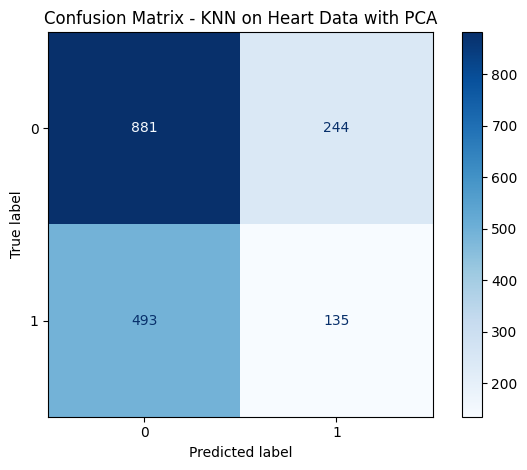

('              precision    recall  f1-score   support\n\n           0       0.64      0.78      0.71      1125\n           1       0.36      0.21      0.27       628\n\n    accuracy                           0.58      1753\n   macro avg       0.50      0.50      0.49      1753\nweighted avg       0.54      0.58      0.55      1753\n',
 0.5795778665145465,
 0.3562005277044855,
 0.21496815286624205,
 0.26812313803376364)

In [11]:
# Re-import PCA due to environment reset
from sklearn.decomposition import PCA

# Recreate PCA instance
pca = PCA(n_components=10, random_state=42)

# Reapply PCA
X_heart_pca = pca.fit_transform(X_heart_scaled)

# Train-test split
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_heart_pca, y_heart, test_size=0.2, random_state=42)

# Train KNN model
knn_heart = KNeighborsClassifier(n_neighbors=5)
knn_heart.fit(Xh_train, yh_train)

# Predict and evaluate
yh_pred = knn_heart.predict(Xh_test)
acc = accuracy_score(yh_test, yh_pred)
prec = precision_score(yh_test, yh_pred)
rec = recall_score(yh_test, yh_pred)
f1 = f1_score(yh_test, yh_pred)
report = classification_report(yh_test, yh_pred)
cm = confusion_matrix(yh_test, yh_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_heart.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - KNN on Heart Data with PCA')
plt.tight_layout()
plt.show()

report, acc, prec, rec, f1

# Summary:
The model does reasonably well detecting non-risk cases, but struggles with high recall for identifying actual risks.

Performance can be improved with:

Hyperparameter tuning (e.g., optimizing k)

Alternative models (e.g., Random Forest)

Balancing the dataset (if imbalanced)